# Test Notebook

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [2]:
# In a Jupyter notebook or IPython environment, run this in the first cell
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
from datasets.utils import split_and_save_images

for folder_name in ["train", "val", "test"]: 
        split_and_save_images(
                input_dir=f"../data/Levir-cd/{folder_name}", 
                output_dir=f"../data/Levir-cd-256/{folder_name}", 
                patch_size=256, 
                images_folder_names=["A", "B"], 
                label_folder_name = "label"
        )


/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
445it [02:35,  2.86it/s]
445it [02:46,  2.67it/s]
445it [00:06, 73.13it/s]


1335 images (1024,1024) have been created into 21360 patches of size (256, 256) and saved at ../data/Levir-cd-256/train


64it [00:24,  2.60it/s]
64it [00:24,  2.57it/s]
64it [00:00, 75.03it/s]


192 images (1024,1024) have been created into 3072 patches of size (256, 256) and saved at ../data/Levir-cd-256/val


128it [00:45,  2.80it/s]
128it [00:49,  2.61it/s]
128it [00:01, 69.92it/s]

384 images (1024,1024) have been created into 6144 patches of size (256, 256) and saved at ../data/Levir-cd-256/test


In [3]:
from models import TinyCD

model = TinyCD(
    bkbn_name="efficientnet_b4",
    pretrained=True,
    output_layer_bkbn="3",
    out_channels=2,
    freeze_backbone=True
)
model.to("cuda")

c:\Users\besni\anaconda3\envs\pytorch-gpu\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\besni\anaconda3\envs\pytorch-gpu\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TinyCD(
  (_backbone): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivation

In [8]:
"""from datasets import xDB_Siamese_Dataset
from training.augmentations import (
    get_val_augmentation_pipeline,
    get_train_augmentation_pipeline
    )

origin_dir = "../data/data_samples/xDB/tier3"
mode = "change_detection"
train_transform = get_train_augmentation_pipeline(
                                image_size=(512,512),
                                mean = (0.485, 0.456, 0.406),
                                std = (0.229, 0.224, 0.225)
                           )

val_transform = get_val_augmentation_pipeline(
                               image_size=(512,512),
                               mean = (0.485, 0.456, 0.406),
                               std = (0.229, 0.224, 0.225)
                           )
train_data = xDB_Siamese_Dataset(origin_dir=origin_dir, 
                           transform=val_transform,
                           mode=mode,
                           type = "train",
                           val_ratio = 0.1, 
                           test_ratio = 0.1, 
                           seed = 42
                           )
val_data = xDB_Siamese_Dataset(origin_dir=origin_dir, 
                           transform=val_transform,
                           mode=mode,
                           type = "val",
                           val_ratio = 0.1, 
                           test_ratio = 0.1, 
                           seed= 42
                           )
test_data = xDB_Siamese_Dataset(origin_dir=origin_dir, 
                           transform=val_transform,
                           mode=mode,
                           type="test",
                           val_ratio = 0.1, 
                           test_ratio = 0.1, 
                           seed= 42
                           )     
"""

Loaded 3 train labels.
Loaded 0 val labels.
Loaded 0 test labels.


c:\Users\besni\anaconda3\envs\pytorch-gpu\Lib\site-packages\pydantic\main.py:390: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [4]:
from datasets import Levir_cd_dataset

from training.augmentations import (
    get_val_augmentation_pipeline,
    get_train_augmentation_pipeline
    )

origin_dir = "../data/Levir-cd-256"
train_transform = get_train_augmentation_pipeline(image_size=None, 
                                          mean = (0.387 , 0.382, 0.325),
                                          std = (0.158 ,0.150, 0.138)
                                          )

val_transform = get_val_augmentation_pipeline(image_size=None, 
                                          mean = (0.387 , 0.382, 0.325),
                                          std = (0.158 ,0.150, 0.138)
                                          )
train_data = Levir_cd_dataset(origin_dir=origin_dir, 
                              transform=train_transform,
                              type = "train"
                              )
val_data = Levir_cd_dataset(origin_dir=origin_dir, 
                              transform=val_transform,
                              type = "val"
                              )
test_data = Levir_cd_dataset(origin_dir=origin_dir, 
                              transform=val_transform,
                              type = "test"
                              )


c:\Users\besni\anaconda3\envs\pytorch-gpu\Lib\site-packages\pydantic\main.py:390: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


Loaded 7120 train samples.
Loaded 1024 val samples.
Loaded 2048 test samples.


In [5]:
from torch.utils.data import DataLoader
train_dl = DataLoader(dataset=train_data, shuffle=True, batch_size=16, pin_memory=True)
val_dl = DataLoader(dataset=val_data, shuffle=True, batch_size=16, pin_memory=True)
test_dl = DataLoader(dataset=test_data, shuffle=False, batch_size=16, pin_memory=True)

In [6]:
from training import train, testing
from torch.utils.data import DataLoader
import torch.nn as nn
import torch 
from metrics import iou_score, f1_score, precision, recall
from losses import DiceLoss, Ensemble, FocalLoss
import torch.optim as optim
from training.utils import define_weighted_random_sampler

mode = "multiclass"
#_ , class_weights_dict = define_weighted_random_sampler(dataset=train_data, mask_key="mask", subset_size=200)
class_weights = [1.0, 20.0] # [v for _ , v in class_weights_dict.items()]
#print("Computed Class Weights : ", class_weights)

nb_epochs = 2
#ce = torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights), reduction='mean').to("cuda")
#focal_loss = FocalLoss(mode=mode, gamma=2)
#dice_loss = DiceLoss(mode=mode)
#criterion = Ensemble(list_losses=[ce, dice_loss], weights = [0.7, 0.3])
criterion =  torch.nn.CrossEntropyLoss(weight=torch.tensor(class_weights), reduction='mean').to("cuda")

metrics = [f1_score, iou_score, precision, recall]

optimizer = optim.AdamW(params=filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3, weight_decay=1e-2,amsgrad=False)
# scheduler for the lr of the optimizer
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)
early_stopping_params = {"patience": 10, "trigger_times": 0}

train(
    model = model,
    train_dl = train_dl,
    valid_dl = val_dl,
    loss_fn = criterion,
    optimizer = optimizer, 
    scheduler = scheduler, 
    metrics = metrics,
    nb_epochs = nb_epochs,
    experiment_name = "Tiny_CD",
    log_dir="../runs",
    model_dir="../models",
    resume_path=None,
    early_stopping_params = early_stopping_params,
    image_key = "post_image",
    mask_key = "mask",
    num_classes = len(class_weights), 
    verbose = False,  # Adding verbose flag
    checkpoint_interval = 5,  # Add checkpoint interval parameter
    debug = False,  # Add debug flag for memory logging, 
    training_log_interval = 2, 
    is_mixed_precision=True,
    reduction= "weighted",
    class_weights = class_weights,
    siamese=True,
    
)

INFO:root:Experiment logs are recorded at ../runs\Tiny_CD_20250105-020906
INFO:root:Model graph has been logged
INFO:root:Hyperparameters have been logged
INFO:root:Epoch 1
INFO:root:--------------------
Epoch 1: 100%|██████████| 445/445 [04:45<00:00,  1.56batch/s, Loss=0.544]
INFO:root:Epoch 1 - Validation Phase
INFO:root:--------------------
Validation Epoch 1: 100%|██████████| 64/64 [00:30<00:00,  2.13batch/s, Loss=0.648]
INFO:root:Epoch 2
INFO:root:--------------------
Epoch 2: 100%|██████████| 445/445 [02:42<00:00,  2.73batch/s, Loss=0.466]
INFO:root:Epoch 2 - Validation Phase
INFO:root:--------------------
Validation Epoch 2: 100%|██████████| 64/64 [00:12<00:00,  5.12batch/s, Loss=0.567]
INFO:root:Total training time: 494.78 seconds


In [7]:
from metrics import compute_model_class_performance

compute_model_class_performance(
    model=model,
    dataloader=test_dl,
    num_classes=2,
    device='cuda',
    class_names=["No Change", "Change"], 
    siamese=True,
    image_key="image",
    mask_key="mask",
    average_mode="macro",
    output_file="../outputs/class_performance.txt"
)

Testing: 100%|██████████| 128/128 [01:10<00:00,  1.81batch/s]


Per-Class Performance Metrics:
+-----------+-----------+--------+----------+--------+--------+
|   Class   | Precision | Recall | F1 Score |  IoU   |  Dice  |
+-----------+-----------+--------+----------+--------+--------+
| No Change |   0.9714  | 0.7556 |  0.8500  | 0.7391 | 0.8500 |
|   Change  |   0.1138  | 0.5849 |  0.1906  | 0.1053 | 0.1906 |
+-----------+-----------+--------+----------+--------+--------+
----------------------------------------
Overall Performance Metrics:
  Precision (macro): 0.5426
  Recall (macro):    0.6703
  F1 Score (macro):  0.5203
Metrics have been saved to ../outputs/class_performance.txt


### Test Ensemble Methods 

In [12]:
from torch.utils.data import DataLoader 
test_dl = DataLoader(
    dataset=test_dl,
    batch_size=8,
    shuffle=False,
    num_workers=8,
    pin_memory=False
)

In [14]:
def benchmark_models(
    models,
    models_names,
    test_dataloader,
    loss_fn,
    metrics,
    image_key="post_image",
    mask_key="post_mask",
    verbose=True,
    is_mixed_precision=True,
    num_classes=5,
    reduction="weighted",
    class_weights=None,
    tta=False,
    siamese=False,
    device="cuda"
):
    """
    Benchmark multiple models on a test dataloader.

    Args:
        models (list): List of models to evaluate.
        models_names (list): List of model's name
        test_dataloader (DataLoader): PyTorch DataLoader with test data.
        loss_fn (callable): Loss function.
        metrics (dict): Dictionary of metric functions to evaluate.
        image_key (str): Key to access image data from the dataloader batch.
        mask_key (str): Key to access mask/label data from the dataloader batch.
        verbose (bool): If True, print detailed logs for each model.
        is_mixed_precision (bool): Use mixed precision during evaluation.
        num_classes (int): Number of classes in the task.
        reduction (str): Reduction method for metrics (e.g., "weighted").
        class_weights (torch.Tensor): Class weights for loss computation.
        tta (bool): Apply test-time augmentation if True.
        siamese (bool): Use Siamese model logic if True.
        device (str) : cuda or cpu

    Returns:
        dict: Dictionary containing test losses and metrics for each model.
    """
    results = {}

    for i, model in enumerate(models):
        if verbose:
            print(f"\nEvaluating Model {i+1}/{len(models)}: {models_names[i]}")
        
        # Test the model using the provided testing function
        epoch_tloss, test_metrics = testing(
            model=model.to(device),
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            metrics=metrics,
            image_key=image_key,
            mask_key=mask_key,
            verbose=verbose,
            is_mixed_precision=is_mixed_precision,
            num_classes=num_classes,
            reduction=reduction,
            class_weights=class_weights,
            tta=tta,
            siamese=siamese,
        )

        # Store results
        results[models_names[i]] = {
            "test_loss": epoch_tloss,
            "test_metrics": test_metrics,
        }

    return results


In [ ]:
display_semantic_predictions_batch(
    images=post_image, 
    mask_predictions=outputs.argmax(dim=1),
    mask_labels=inputs["post_mask"],
    normalized={
        "mean" : (0.485, 0.456, 0.406),
        "std" : (0.229, 0.224, 0.225)
        }
)

In [ ]:
display_semantic_predictions_batch(
    images=pre_image, 
    mask_predictions=tta_predictions,
    mask_labels=inputs["post_mask"],
    normalized={
        "mean" : (0.485, 0.456, 0.406),
        "std" : (0.229, 0.224, 0.225)
        }
)

### Test Segformer 

In [3]:
from models import Segformer, Unet, ResNet_Unet
model_name = "nvidia/segformer-b0-finetuned-ade-512-512"
label2id = {"building": 1, "background": 0 } #{"cloud": 1, "no_cloud": 0 }
id2label = {v: k for k,v in label2id.items()}
num_labels = 2
freeze_encoder = True

model = Segformer(model_name=model_name,
                  label2id=label2id,
                  num_labels=num_labels,
                  freeze_encoder=freeze_encoder
                  )

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-ade-512-512 and are newly initialized because the shapes did not match:
- decode_head.classifier.bias: found shape torch.Size([150]) in the checkpoint and torch.Size([2]) in the model instantiated
- decode_head.classifier.weight: found shape torch.Size([150, 256, 1, 1]) in the checkpoint and torch.Size([2, 256, 1, 1]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Encoder weights have been frozen.


In [50]:
from datasets import  Puerto_Rico_Building_Dataset
from torch.utils.data import DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from training.augmentations import get_val_augmentation_pipeline

# Define Albumentations transforms with normalization
transform = get_val_augmentation_pipeline(image_size=(512, 512), max_pixel_value=1, mean=(0,0,0), std=(1,1,1))

### Test Dataset 

In [51]:
from models import AutoEncoder
from training.augmentations import get_val_augmentation_pipeline
import torch.nn as nn

cloud_filter_params = {"model_class": AutoEncoder(num_input_channel=3,base_channel_size=64), 
                        "device": "cuda", 
                        "file_path": "../models/AutoEncoder_Cloud_Detector_0.001297.pth",
                        "threshold": 0.001297, 
                        "loss": nn.MSELoss,
                        "batch_size": 32
                        }

In [72]:
data_puerto = Puerto_Rico_Building_Dataset(
    base_dir="../data/Puerto_Rico_dataset/tiff_tiles",
    pre_disaster_dir="Pre_Event_Grids_In_TIFF",
    post_disaster_dir="Post_Event_Grids_In_TIFF",
    mask_dir="Post_Event_Grids_In_TIFF_mask",
    transform=transform,
    extension="tif",
    cloud_filter_params=cloud_filter_params,
    preprocessing_mode="online",
    filtered_list_path=None
    )

<class 'models.Auto_Encoder.AutoEncoder'> Model loaded from ../models/AutoEncoder_Cloud_Detector_0.001297.pth
A AutoEncoder model has been loaded from ../models/AutoEncoder_Cloud_Detector_0.001297.pth on cuda.


In [100]:
from models import ResNet_UNET

model = ResNet_UNET(
        in_channels=3,
        out_channels=2,
        backbone_name="resnet18",
        pretrained=True,
        freeze_backbone=True,
    )
model = model.load(file_path="../models/xDB_ResNet18_Unet_20241130-201241_best_model.pth").to("cuda")

ResNet_UNET Model loaded from ../models/xDB_ResNet18_Unet_20241130-201241_best_model.pth


/home/onyxia/work/damaged-building-detector/src/models/ResNet_Unet.py:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(file_path))


In [101]:
data_dl = DataLoader(dataset=data_puerto, batch_size=16, shuffle=True)

In [102]:
inputs = next(iter(data_dl))
outputs = model.predict(inputs["pre_image"].to("cuda"))

In [ ]:
from utils import display_semantic_predictions_batch

display_semantic_predictions_batch(images=inputs["pre_image"], 
                                    mask_predictions=outputs,
                                    mask_labels=inputs["mask"], 
                                    normalized=None, 
                                    folder_path=None
                                    )

In [105]:
from models import Maskrcnn
# Initialize the Mask R-CNN model
from models import Maskrcnn
maskrcnn = Maskrcnn(num_classes=2, hidden_layer_dim=256, pretrained=False)
maskrcnn.load("../models/xDB_ResNet50_MaskRCNN_checkpoint.pth")

Model loaded from ../models/xDB_ResNet50_MaskRCNN_checkpoint.pth


In [ ]:
from utils import display_semantic_predictions_batch
import numpy as np
import torch
maskrcnn.eval()
with torch.no_grad():
    images = inputs["pre_image"].to("cuda")
    mask_predictions = maskrcnn.predict_sem_seg(images = images)

In [ ]:
display_semantic_predictions_batch(images=inputs["pre_image"], 
                                    mask_predictions=mask_predictions,
                                    mask_labels=inputs["mask"], 
                                    normalized=None, 
                                    folder_path=None
                                    )

In [ ]:
from utils import display_instance_predictions_batch
maskrcnn.eval()
with torch.no_grad():
    images = inputs["pre_image"].to("cuda")
    instances_predictions = maskrcnn.predict(images = images)
    
display_instance_predictions_batch(images, mask_predictions, score_threshold=0.6, max_images=len(images), display=["mask","boxes"])

### Post Processing techniques 

In [308]:
from models import SiameseResNetUNet
model = SiameseResNetUNet(
    in_channels=3,
    out_channels=5,
    backbone_name="resnet18",
    pretrained=True,
    freeze_backbone=False,
    mode="conc")
model = model.load("../models/Siamese_ResNet18_Unet_20241206-152757_best_model.pth")
model = model.to("cuda")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/onyxia/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 21.4MB/s]
/home/onyxia/work/damaged-building-detector/src/models/Siamese_ResNet_Unet.py:172: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any 

SiameseResNetUNet Model loaded from ../models/Siamese_ResNet18_Unet_20241206-152757_best_model.pth


In [309]:
file_paths = [f"../data/xDB/tier3/images/joplin-tornado_0000000{i}_pre_disaster.png" for i in range(0,5)]
pre_images = [Image.open(file_path).convert('RGB') for file_path in file_paths]
file_paths = [f"../data/xDB/tier3/images/joplin-tornado_0000000{i}_post_disaster.png" for i in range(0,5)]
post_images = [Image.open(file_path).convert('RGB') for file_path in file_paths]

big_image_pre = merge_images(pre_images)
big_image_post = merge_images(post_images)

inference = Inference(
        model=model, 
        pre_image=big_image_pre, 
        post_image=big_image_post,
        window_size=512, 
        num_classes=5,
        stride=100, 
        device ='cuda', 
        mode="siamese",
        transform=transforms.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean=[0.349, 0.354, 0.268], std=[0.114, 0.102, 0.094]),
        ])
    )

prediction = inference.infer().argmax(axis=0)

282it [01:49,  2.58it/s]


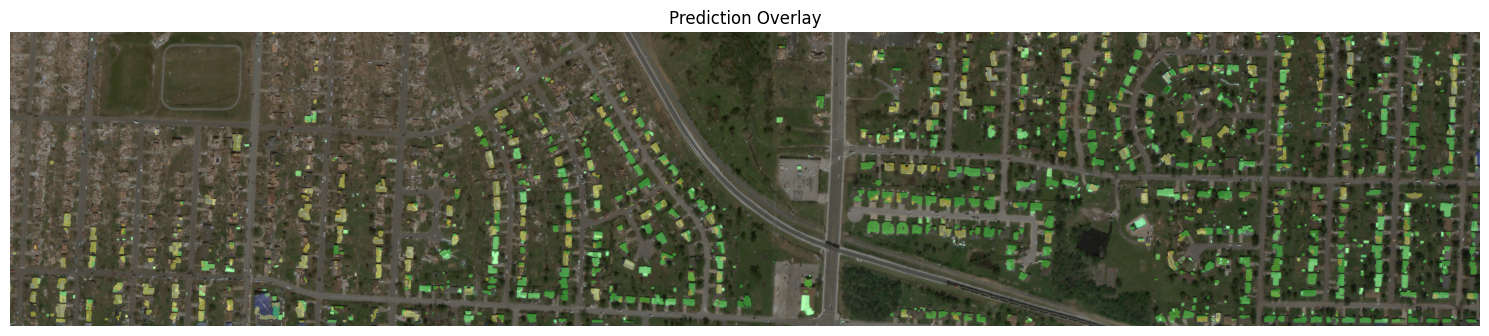

In [312]:
damage_colors = {
        0: (0, 0, 0),      # Black for background
        1: (0, 255, 0),    # Green for no-damage
        2: (255, 255, 0),  # Yellow for minor-damage
        3: (255, 126, 0),  # Orange for major-damage
        4: (255, 0, 0)     # Red for destroyed
    }

plot_results_building(image=big_image_post, prediction=prediction, color_dict = damage_colors)

In [3]:
from datasets import Levir_cd_dataset

c:\Users\besni\anaconda3\envs\pytorch-gpu\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [44]:
data.L_paths

[WindowsPath('../data/data_samples/Levir-cd/test/label/test_101.png')]

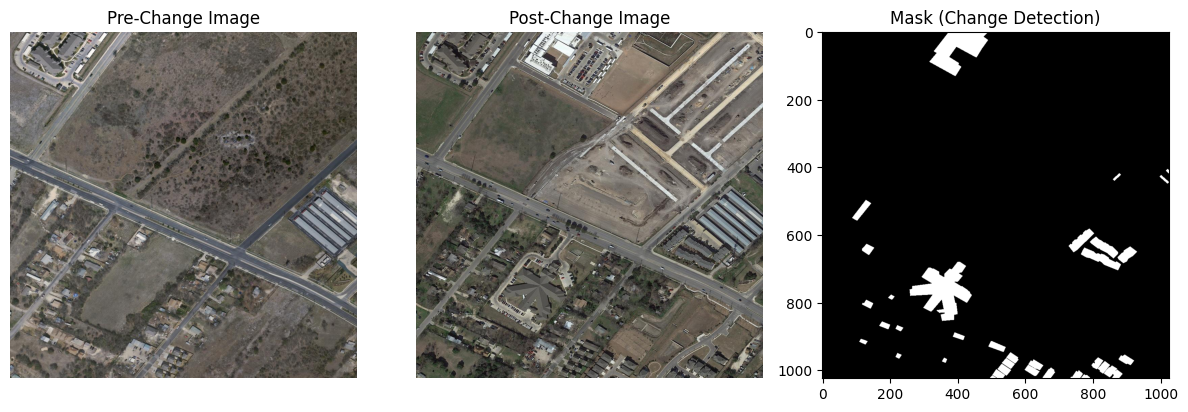

In [47]:
data.display_data(list_indices=[0])

In [63]:
from training.augmentations import (
    get_val_augmentation_pipeline )

transform = get_val_augmentation_pipeline(image_size = (512, 512))
data = Levir_cd_dataset(origin_dir="../data/data_samples/Levir-cd", type="test", transform=transform)